# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Цель исследования - установить параметры, влияющие на рыночную стоимость квартир в Санкт-Петербурге и области. \
     
План работы: \
1.Установить какие факторы больше всего влияют на стоимость квартиры. \
2.Выяснить сколько по времени занимает продажа квартиры. Какую продажу можно назвать быстрой или долгой. \
3.Определить среднюю стоимость квартиры в 10 населённых пунктов с наибольшим числом объявлений. \
4.Исследовать стоимость недвижимости взависимости от удаленности от центра города. \
    
Исходные данные - данные сервиса «Яндекс.Недвижимость» (архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет).
    
    

 


### Изучение данных из файла



In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [97]:
data = pd.read_csv(r'C:\Users\user\Desktop\Обучение\Яндекс\Проекты GitHub\3 Исследование объявлений о продаже квартир/real_estate_data.csv', sep='\t')


#### Изучаем общую информацию о полученном датафрейме


In [2]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


#### Строим общую гистограмму для числовых столбцов таблицы

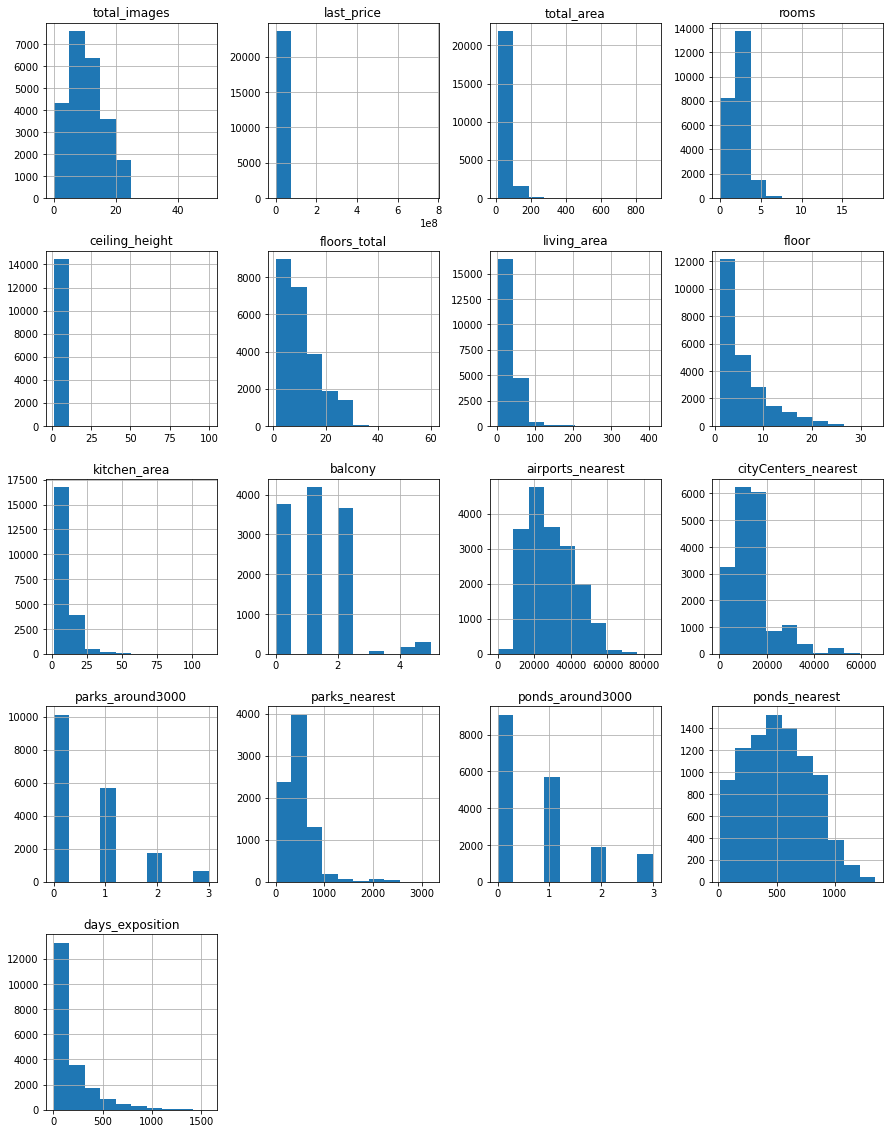

In [5]:
data.hist(figsize=(15, 20));

#### Вывод
Всего в таблице 23699 записи. Имеются пропущенные и аномальные значения, некооректные типы данных. Неправильные названия столбцов.

### Предобработка данных

#### Исправляем названия столбцов

In [6]:

print(data.columns)

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


In [7]:
data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest', 'parks_around3000' : 'parks_around_3000', 'ponds_around3000' : 'ponds_around_3000' }, inplace=True)

#### Работаем с пропущенными значениями

##### Смотрим количество пропущенных значений


In [8]:
data.isnull().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
city_centers_nearest     5519
ponds_around_3000        5518
parks_around_3000        5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

##### Описываем пропушенные знечения

1. 9195 ceiling_height - в трети объявлений пропущена высота потолков, заменим на медианное значение по всему датасету


2. 86 floors_total - данные не были заполнены, удалим данные строки.


3. 1903 living_area - данные не были заполнены, заменим на медианное значение (для большей точности применим медианный коэффициент - отношение жилой площади к общей площади по всему датасету).


4. 20924 is_apartment - предположим, что это не апартаменты и присвоим False.


5. 2278 kitchen_area - данные не были заполнены, заменим на медианное значение (для большей точности применим медианный коэффициент- отношение площади кухни к общей площади по всему датасету).


6. 11519 balcony - вероятно там нет балконов, заменяем на 0


7. 49 locality_name - данные не были заполнены, удалим данные строки.


8. 5542 airports_nearest - верятно аэропортов рядом нет, оставляем Null


9. 5519 city_centers_nearest - вероятно центр города далеко, оставляем Null


10. 5518 parks_around_3000 - парков нет в радиусе 3км, заменяем на 0


11. 15620 parks_nearest - парков нет,  оставляем Null


12. 5518 ponds_around_3000 - прудов нет в радиусе 3км, заменяем на 0


13. 14589 ponds_nearest - прудов нет,  оставляем Null


14. 3181 days_exposition - объявление не было опубликовано, оставляем Null

##### Устраняем пропущенные значения

In [9]:
# 1. Заменяем пустые значения высоты потолков на медианное значение по всему датасету
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [10]:
# 2. Удаляем строки, где отсутствует этажность
data.dropna(subset=['floors_total'], inplace=True)


In [11]:
# 3. Заменяем пустые значения жилой площади
living_ratio = data['living_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living_ratio * data['total_area'], inplace=True)

In [12]:
# 4. Заменяем пропущенные значения в аппартаментах на нет
# data['is_apartment'].sum()
data['is_apartment'] = data['is_apartment'].fillna(value=False)

In [13]:
# 5. Заменяем пустые значения площади кухни
kitchen_ratio = data['kitchen_area'].mean() / data['total_area'].mean()
data['kitchen_area'].fillna(kitchen_ratio * data['total_area'], inplace=True)

In [14]:
# 6. Заменяем пропущенные значения в количестве балконов на 0
data['balcony'] = data['balcony'].fillna(value=0)

In [15]:
# 7. Удаляем строки, где отсутствует локация
data.dropna(subset=['locality_name'], inplace=True)

In [16]:
# 10. Заменяем пропущенные значения в количестве праков  на 0
data['parks_around_3000'] = data['parks_around_3000'].fillna(value=0)

In [17]:
# 12. Заменяем пропущенные значения в количестве прудов на 0
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(value=0)

In [18]:
data.isna().sum().sort_values(ascending=False)

parks_nearest           15535
ponds_nearest           14529
airports_nearest         5524
city_centers_nearest     5501
days_exposition          3171
last_price                  0
ponds_around_3000           0
parks_around_3000           0
locality_name               0
balcony                     0
kitchen_area                0
total_images                0
studio                      0
is_apartment                0
floor                       0
living_area                 0
floors_total                0
ceiling_height              0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

In [19]:
# Удаляем строки, где сумма площадей кухни и жилой площади превышают общую
print('Общая площадь меньше суммы площадей: ',data.query('living_area + kitchen_area > total_area')['total_area'].count())
data.drop(index=data.query('living_area + kitchen_area > total_area').index,inplace=True)

Общая площадь меньше суммы площадей:  119


#### Работа с типами данных



##### Описываем изменения типов данных

Сменим тип данных:\
~`last_price - для экономии памяти\
~ first_day_exposition - для удобства работы с датой\
~ balcony  - для экономии памяти\
~ parks_around_3000 - для экономии памяти \
~ ponds_around_3000 - для экономии памяти\
~ floors_total - для экономии памяти\
~ is_apartment - для удобства работы с булевым значением \
~ days_exposition - приводим к целочисленному типу и устанавливаем маркер \
А так же для наглядности при просмотре таблицы во всех случаях.

##### Изменяем  типы данных

In [20]:
# Приводим в целочисленный тип стоимость квартиры
data['last_price'] = data['last_price'].astype(int)

In [21]:
# Приводим к типу даты дату публикации
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [22]:
# Приводим в целочисленный тип количество балконов. 
data['balcony'] = data['balcony'].astype(int)

In [23]:
# Приводим в целочисленный тип количество парков. 
data['parks_around_3000'] = data['parks_around_3000'].astype(int)

In [24]:
# Приводим в целочисленный тип количество прудов. 
data['ponds_around_3000'] = data['ponds_around_3000'].astype(int)

In [25]:
# Приводим в целочисленный тип этажность.
data['floors_total'] = data['floors_total'].astype(int)

In [26]:
# Приводим к булевому значению аппаратменты
data['is_apartment'] = data['is_apartment'].astype(bool)

In [27]:
# Устанавливаем маркер 77777 для пропусков в сроке продажи, приводим к целочисленному типу
data['days_exposition'].fillna(77777, inplace=True)
data['days_exposition'] = data['days_exposition'].astype(int)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23446 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23446 non-null  int64         
 1   last_price            23446 non-null  int64         
 2   total_area            23446 non-null  float64       
 3   first_day_exposition  23446 non-null  datetime64[ns]
 4   rooms                 23446 non-null  int64         
 5   ceiling_height        23446 non-null  float64       
 6   floors_total          23446 non-null  int64         
 7   living_area           23446 non-null  float64       
 8   floor                 23446 non-null  int64         
 9   is_apartment          23446 non-null  bool          
 10  studio                23446 non-null  bool          
 11  open_plan             23446 non-null  bool          
 12  kitchen_area          23446 non-null  float64       
 13  balcony         

#### Изучаем уникальные значения в столбце с названиями и устраняем неявные дубликаты.

##### Выясняем и удаляем количество явных дубликатов

In [29]:
print('Количество явных дубликатов:', data.duplicated().sum())

Количество явных дубликатов: 0


##### Действия по устранению неявных дубликатов:
1.Приводим все значения к нижнему регистру\
2.Заменяем все  буквы "ё" на "е"\
3.Заменяем "городской поселок" на "поселок городского типа"\

In [30]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [31]:
print('Количество уникальных значений locality_name:', len(data['locality_name'].sort_values().unique()))

Количество уникальных значений locality_name: 364


In [32]:
#1
data['locality_name'] = data['locality_name'].str.lower()
print('Количество уникальных значений locality_name:', len(data['locality_name'].sort_values().unique()))

Количество уникальных значений locality_name: 364


In [33]:
#2
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
print('Количество уникальных значений locality_name:', len(data['locality_name'].sort_values().unique()))

Количество уникальных значений locality_name: 330


In [34]:
#3
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок городского типа')
print('Количество уникальных значений locality_name:', len(data['locality_name'].sort_values().unique()))

Количество уникальных значений locality_name: 323


#### Находим и устраняем редкие и выбивающиеся значения

In [35]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23446.000000,2.344600e+04,23446.000000,23446.000000,23446.000000,23446.000000,23446.000000,23446.000000,23446.000000,23446.000000,17957.000000,17980.000000,23446.000000,7994.000000,23446.000000,8992.000000,23446.000000
mean,9.881856,6.536319e+06,60.377716,2.073147,2.722229,10.664634,34.558824,5.870682,10.484579,0.592596,28805.054129,14200.166796,0.468609,490.765949,0.589440,518.253448,10635.878103
std,5.680656,1.088363e+07,35.666324,1.077020,0.966972,6.586790,22.332456,4.865002,6.003375,0.960434,12632.078812,8616.131070,0.747738,340.768237,0.883148,277.966694,26495.779508
min,0.000000,1.219000e+04,13.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.420000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18574.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26763.000000,13095.000000,0.000000,455.000000,0.000000,503.000000,124.000000
75%,14.000000,6.799000e+06,69.747500,3.000000,2.700000,16.000000,42.100000,8.000000,12.000000,1.000000,37275.000000,16293.000000,1.000000,612.000000,1.000000,730.000000,391.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,77777.000000


##### Изучим значения по каждому из столбцов: 
total_images - фотографи.
- все в порядке, оставляем как есть

##### last_price - стоимость квартиры
Оставим квартиры в диапозоне цены от 500 000 до 75 000 000 рублей\
Квартиры с меньшей и большей стоимостью встречаются крайне редко.

In [36]:
print('Квартир стоимостью меньше 500 000:', data.query('last_price < 500000')['last_price'].count())

Квартир стоимостью меньше 500 000: 14


In [37]:
print('Квартир стоимостью бльше 75 000 000:', data.query('last_price > 75000000')['last_price'].count())

Квартир стоимостью бльше 75 000 000: 66


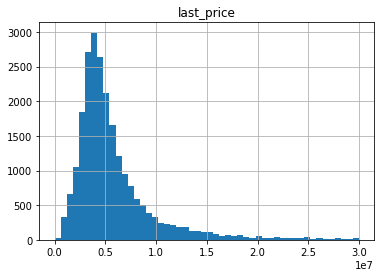

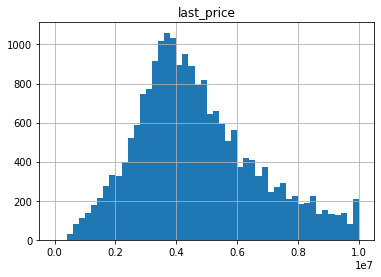

In [38]:
data.hist('last_price', bins=50, range=(0,3e+07));
data.hist('last_price', bins=50, range=(0,1e+07));
data.drop(index=data.query('last_price < 500000').index,inplace=True)
data.drop(index=data.query('last_price > 75000000').index,inplace=True)


##### total_area - общая площадь.
1.Квартир площадью меньше 10 кв.м.мне бывает, проверим это.\
2.Квартиры площадью больше 500 кв.м. встречаются редко, их можно удалить.\
3.Переведем в целочисленный формат.

Квартир площадью менее 10 кв.м.: 0
Квартир площадью более 500 кв.м.: 2


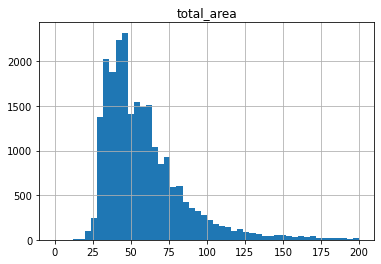

In [39]:
print('Квартир площадью менее 10 кв.м.:',data.query('total_area < 10')['total_area'].count()) 
print('Квартир площадью более 500 кв.м.:',data.query('total_area > 500')['total_area'].count())

data.drop(index=data.query('total_area > 500').index,inplace=True)

data.hist('total_area', bins=50, range=(0,200));

data['total_area'] = data['total_area'].astype(int)

##### rooms - количество комнат.

In [40]:
data['rooms'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 14, 16, 19])

In [41]:
data.query('rooms == 0')['rooms'].count()

176

194 квартиры без комнат, наверное это студии, аппартаменты или открытая планировка, проверим.

In [42]:
print('Квартиры без комнат и студии:',data.query('rooms == 0 and studio')['rooms'].count()) 
print('Квартиры без комнат и апартаменты:',data.query('rooms == 0 and is_apartment')['rooms'].count())
print('Квартиры без комнат и свободная планировка:',data.query('rooms == 0 and open_plan')['rooms'].count())


Квартиры без комнат и студии: 122
Квартиры без комнат и апартаменты: 0
Квартиры без комнат и свободная планировка: 54


Все вено, квартиры без комнат это студии и свободная планировка.

In [43]:
print(data.query('rooms > 10')['rooms'].count())
# Удалим квартиры с более чем 10 комнатами
data.drop(index=data.query('rooms > 10').index,inplace=True)

6


##### ceiling_height - высота потолков.	

In [44]:
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,   3.5 ,
      

1.Квартиры с высотой потолков меньше 2.5 метров и больше 4 метров рассматривать не будем.

2.Высота потолков от 20 до 100 метров, скорее всего либо ошибка ввода данных (не поставили точку, заменим на новое значение) либо выброс(удалим).\
3.Построим гистограмму.

In [45]:
print('Высота потолко между 4 и 40:', data.query('(ceiling_height > 4) and (ceiling_height <= 40)')['ceiling_height'].count())
data.update(data[(data['ceiling_height'] > 4) & (data['ceiling_height'] <= 40)]['ceiling_height']/10)
print('Высота потолков меньше 2,5:', data.query('ceiling_height < 2.5')['ceiling_height'].count())
print('Высота потолков больше 4:', data.query('ceiling_height > 4')['ceiling_height'].count())
print('Высота потолков больше 40:', data.query('ceiling_height > 40')['ceiling_height'].count())
data.drop(index=data.query('ceiling_height < 2.5').index,inplace=True)
data.drop(index=data.query('ceiling_height > 4').index,inplace=True)
data.drop(index=data.query('ceiling_height > 40').index,inplace=True)

Высота потолко между 4 и 40: 63
Высота потолков меньше 2,5: 119
Высота потолков больше 4: 1
Высота потолков больше 40: 1


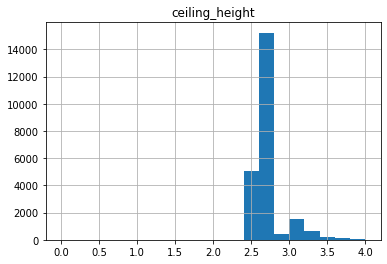

In [46]:
data.hist('ceiling_height',bins=20,range=(0,4));

##### floors_total - количество этажей.

In [47]:
data['floors_total'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 52,
       60])

Все в порядке, есть квартиы как в одноэтажных домах, так и в многоэтажных.

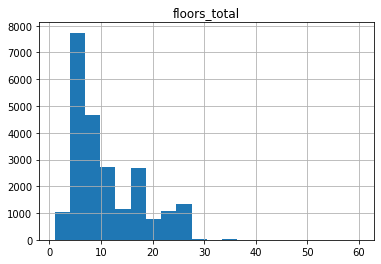

In [48]:
data.hist('floors_total', bins=20);

##### living_area - жилая площадь.
1.Удалим квартиры с жилой полощадюю менее 10 кв.м., таких не бывает.\
2.Так же удалим квартиры с жилой площадью более 500 кв.м.\
3.Переведем в формат целых чмсел.
3.Построим гистограмму.

Жилая площадь меньше 10 кв.м.:  31
Жилая площадь больше 500:  0


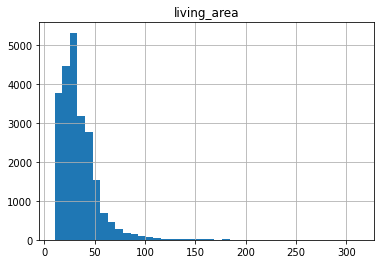

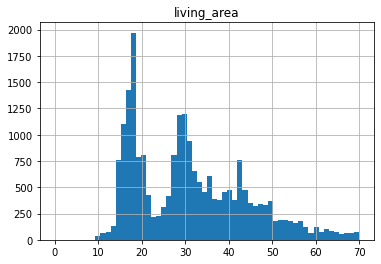

In [49]:
print('Жилая площадь меньше 10 кв.м.: ',data.query('living_area < 10')['living_area'].count())
print('Жилая площадь больше 500: ',data.query('living_area > 500')['living_area'].count())

data.drop(index=data.query('living_area < 10').index,inplace=True)
data.drop(index=data.query('living_area > 500').index,inplace=True)

data.hist('living_area', bins=40);
data.hist('living_area', bins=60, range=(0,70));
data['living_area'] = data['living_area'].astype(int)

##### floor - этаж.
Все хорошо.

In [50]:
data['floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

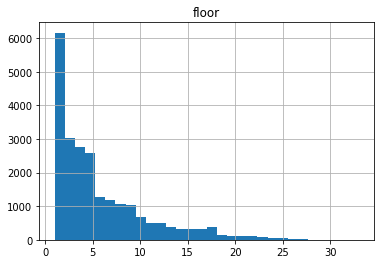

In [51]:
data.hist('floor',bins=30);

##### kitchen_area - площадь кухни.
1.Удалим квартиры с площадью меньше 3кв.м. и больше 45 кв.м.\
2.Переведем в целочисленный формат.\
3.Построим гистограмму.


Площадь кухни меньше 3 кв.м.:  15
Площадь кухни больше 45 кв.м.:  41


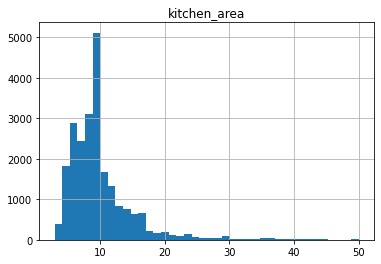

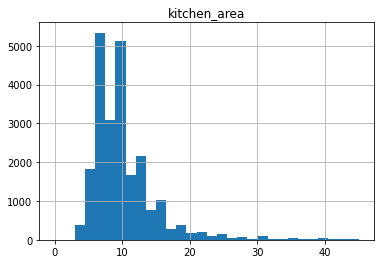

In [52]:
print('Площадь кухни меньше 3 кв.м.: ',data.query('kitchen_area < 3')['living_area'].count())
print('Площадь кухни больше 45 кв.м.: ',data.query('kitchen_area > 50')['living_area'].count())
data.drop(index=data.query('kitchen_area < 3').index,inplace=True)
data.drop(index=data.query('kitchen_area > 50').index,inplace=True)

data['kitchen_area'] = data['kitchen_area'].astype(int)

data.hist('kitchen_area', bins=40);
data.hist('kitchen_area', bins=30, range=(0,45));

##### balcony - балконы
Все хорошо.

[0 1 2 3 4 5]


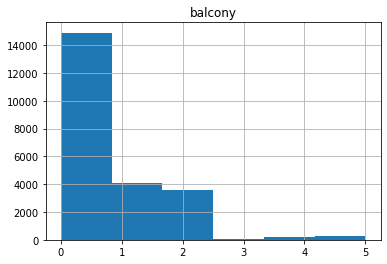

In [53]:
print(data['balcony'].sort_values().unique())
data.hist('balcony', bins=6);


##### airports_nearest - близость аэропорта.
Все хорошо

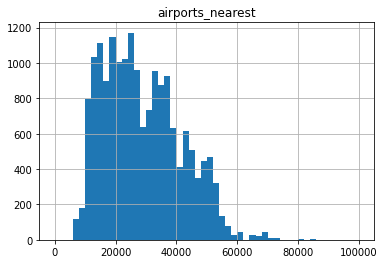

In [54]:
data.hist('airports_nearest', bins=50, range=(0,100000));

##### city_centers_nearest - близость к центру города ближайшего.
Все хорошо.

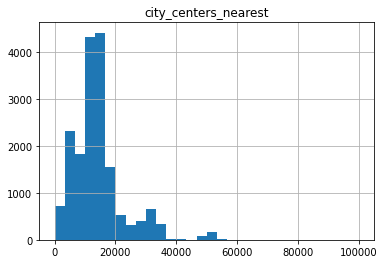

In [55]:
data.hist('city_centers_nearest', bins=30, range=(0,100000));

##### parks_around3000 - количество парков вокруг.
Все хорошо

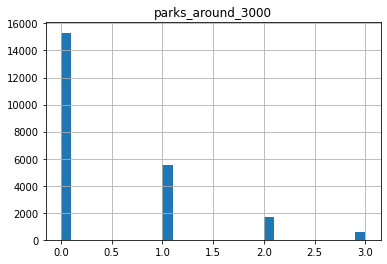

In [56]:
data.hist('parks_around_3000', bins=30);

##### parks_nearest - ближайший парк.
Все хорошо.

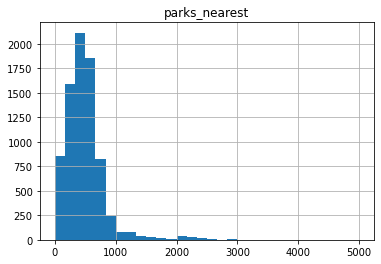

In [57]:
data.hist('parks_nearest', bins=30, range=(0,5000));

##### ponds_around3000 - водоемы вокруг.
Все хорошо.

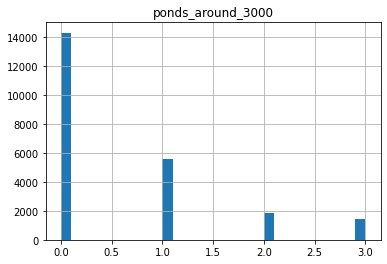

In [58]:
data.hist('ponds_around_3000', bins=30);

##### ponds_nearest - ближайший водоем.
Все хорошо.

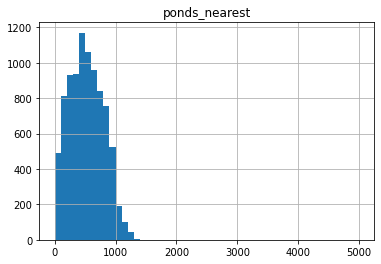

In [59]:
data.hist('ponds_nearest', bins=50, range=(0,5000));

##### days_exposition - сколько дней размещено объявление

Объявление не было оопубликовано:  0
Объявлению больше 3 лет :  163


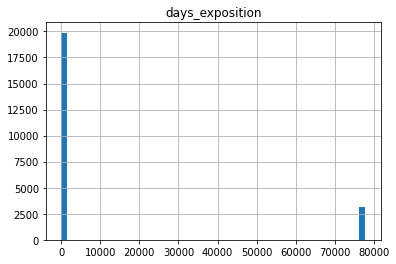

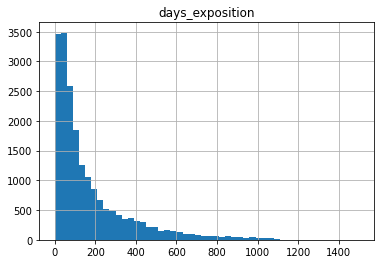

In [60]:
print('Объявление не было оопубликовано: ',data.query('days_exposition == 0')['days_exposition'].count())

print('Объявлению больше 3 лет : ',data.query('(days_exposition > 365*3) and (days_exposition != 77777)')['days_exposition'].count())

data.drop(index=data.query('(days_exposition > 365*3) and (days_exposition != 77777)').index,inplace=True)

data.hist('days_exposition', bins=50);
data.hist('days_exposition', bins=50, range=(0, 1500));

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22988 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22988 non-null  int64         
 1   last_price            22988 non-null  int64         
 2   total_area            22988 non-null  int64         
 3   first_day_exposition  22988 non-null  datetime64[ns]
 4   rooms                 22988 non-null  int64         
 5   ceiling_height        22988 non-null  float64       
 6   floors_total          22988 non-null  int64         
 7   living_area           22988 non-null  int64         
 8   floor                 22988 non-null  int64         
 9   is_apartment          22988 non-null  bool          
 10  studio                22988 non-null  bool          
 11  open_plan             22988 non-null  bool          
 12  kitchen_area          22988 non-null  int64         
 13  balcony         

##### Проверим наиболее важные минимальные и максимальные значения

In [62]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area', 'floor',
       'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,988.00","22,988.00","22,988.00","22,988.00","22,988.00","22,988.00","22,988.00","22,988.00","22,988.00"
min,0.00,17.00,2.50,1.00,"500,000.00",10.00,3.00,1.00,1.00
max,10.00,483.00,4.00,"77,777.00","75,000,000.00",312.00,50.00,33.00,60.00


### Добавление  в таблицу новых столбцов

#### Добавляем столбец со стоимостью квадратного метра, приводим его в целочисленный тип

In [63]:
data['sm_price'] = data['last_price'] / data['total_area']
data['sm_price'] = data['sm_price'].astype(int)

#### Добавляем столбцы дня недели, месяца и года

In [64]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

#### Тип этажа квартиры 

In [65]:
# Создаим функцию для заполнения нового столбца
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_group, axis=1)

# Функция для заполнения еще одного столбца с цифровыми значениями (пригодиться в дальнейшем)
def floor_group_digit(row):
    if row['floor'] == 1:
        return 0
    elif row['floor'] == row['floors_total']:
        return 2
    else:
        return 1
data['floor_type_digit'] = data.apply(floor_group_digit, axis=1)


#### Расстояние до центра города в километрах

In [66]:
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)
data['city_centers_nearest_km'] = data['city_centers_nearest_km'].astype('Int32')

### Проведение исследовательского анализ данных

#### Изучуние параметров объектов:

##### total_area - полощадь квартиры

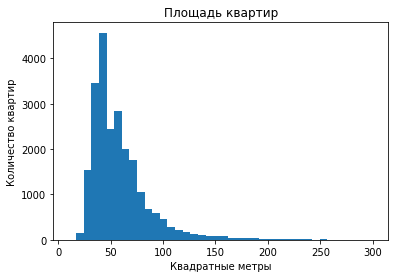

Наибольшие по площади варианты:
660      483
6221     470
3676     441
14991    413
8822     398
5042     380
21990    373
19961    365
1494     364
15607    356
Name: total_area, dtype: int64


In [67]:
plt.hist(data['total_area'], bins=40, range=(10,300))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по площади варианты:')
print(data['total_area'].sort_values(ascending=False).head(10))


##### living_area - жилая площадь

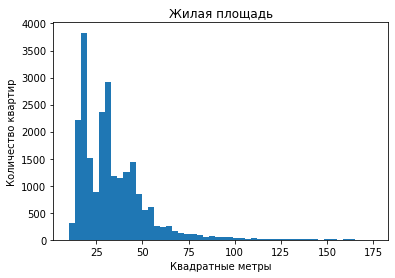

Наибольшие по жилой площади варианты:
660      312
3676     252
1494     250
15607    248
6221     248
2580     230
16915    225
21685    211
10246    200
13397    199
Name: living_area, dtype: int64


In [68]:
plt.hist(data['living_area'], bins=50, range=(10,175))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по жилой площади варианты:')
print(data['living_area'].sort_values(ascending=False).head(10))


##### kitchen_area- площадь кухни

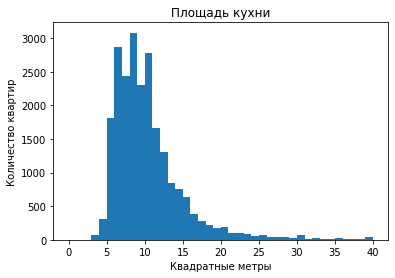

Наибольшие по площади кухни варианты:
5135     50
10001    50
656      50
51       50
5042     50
511      50
2356     50
19267    50
21331    49
263      49
Name: kitchen_area, dtype: int64


In [69]:
plt.hist(data['kitchen_area'], bins=40, range=(0,40))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по площади кухни варианты:')
print(data['kitchen_area'].sort_values(ascending=False).head(10))

##### last_price - стоимость кваритры

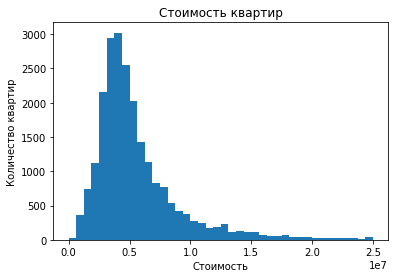

Наибольшие по цене варианты:
6020     75000000
12865    75000000
19267    74000000
20820    73900000
14668    73884056
11336    72375000
7558     72000000
16869    68500000
21990    68000000
20355    68000000
Name: last_price, dtype: int64

Наименьшие по цене варианты:
14295    500000
2097     500000
14904    500000
4405     500000
22430    520000
12607    530000
7962     550000
7376     550000
1358     550000
11351    550000
Name: last_price, dtype: int64


In [70]:
plt.hist(data['last_price'], bins=40, range=(0,25000000))
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по цене варианты:')
print(data['last_price'].sort_values(ascending=False).head(10))
print()
print('Наименьшие по цене варианты:')
print(data['last_price'].sort_values(ascending=True).head(10))

##### rooms - количество комнат

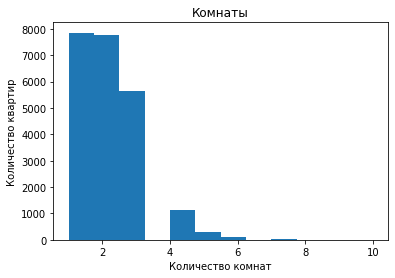

Наибольшие по числу комнат варианты:
18891    10
4149     10
18119    10
8860      9
13019     9
8822      9
20791     9
16915     9
13397     9
9550      9
Name: rooms, dtype: int64


In [71]:
plt.hist(data['rooms'], bins=12, range=(1,10))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по числу комнат варианты:')
print(data['rooms'].sort_values(ascending=False).head(10))

##### ceiling_height -высота потолков

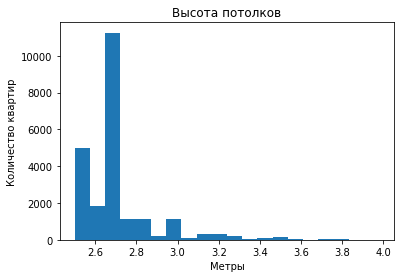

Наибольшие по высоте потолков варианты:
7696     4.0
13564    4.0
10228    4.0
19619    4.0
21857    4.0
15168    4.0
8489     4.0
22965    4.0
8713     4.0
22083    4.0
Name: ceiling_height, dtype: float64

Наименьшие по высоте потолков варианты:


23698    2.5
21206    2.5
18925    2.5
15581    2.5
2821     2.5
15580    2.5
6710     2.5
6709     2.5
6706     2.5
15576    2.5
Name: ceiling_height, dtype: float64

In [72]:
plt.hist(data.query('(ceiling_height > 2) & (ceiling_height < 4)')['ceiling_height'], bins=20)
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по высоте потолков варианты:')
print(data['ceiling_height'].sort_values(ascending=False).head(10))
print()
print('Наименьшие по высоте потолков варианты:')
data['ceiling_height'].sort_values(ascending=True).head(10)

##### floor - этаж

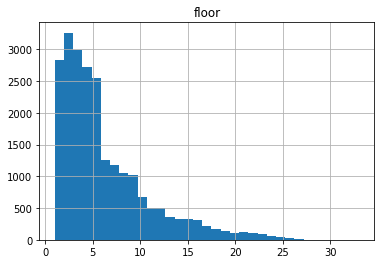

In [73]:
data.hist('floor', bins=data['floor'].max());

##### floore_total - этажность

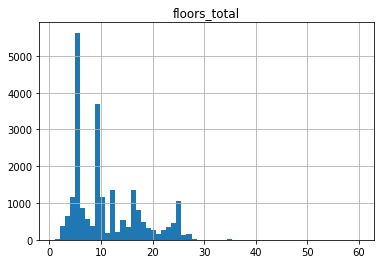

In [74]:
data.hist('floors_total', bins=data['floors_total'].max());

##### city_centers_nearest - близость к центру города

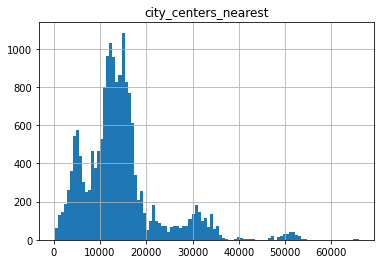

In [75]:
data.hist('city_centers_nearest', bins=100);

##### airports_nearest - близость к аэропорту

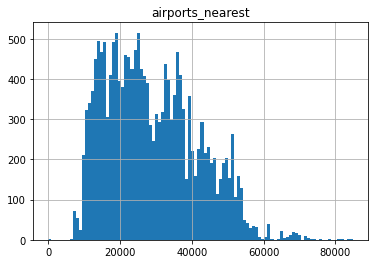

In [76]:
data.hist('airports_nearest', bins=100);

##### parks_nearest близость к парку

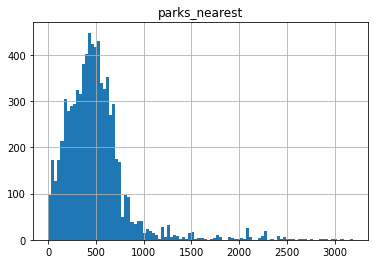

In [77]:
data.hist('parks_nearest', bins=100);

##### weekday - день публикации

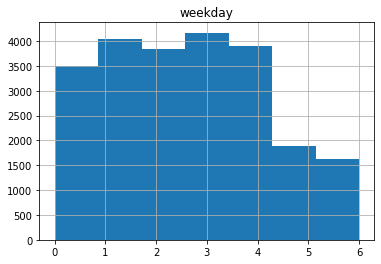

In [78]:
data.hist('weekday', bins=7);

##### month - месяц публикации

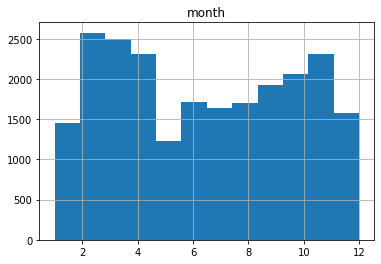

In [79]:
data.hist('month', bins=12);

##### floor_type - тип этажа

<AxesSubplot:xlabel='floor_type', ylabel='count'>

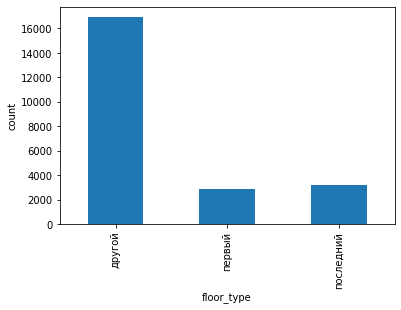

In [80]:
data.groupby('floor_type')['floor_type'].count().plot(kind='bar', ylabel = 'count')

Вывод:\
4.1.1 total_area - площадь квартиры. Большинство квартир с площадью менее 100 метров. Есть малое количество кравтир более 200 метров., вероятно это элитная недвижимость. 

4.1.2 living_area - жилая площадь. Наиболее распространены кваритры с жилой площадью от 10 до 50 метров, после 100 метров квартир немного. Есть два явных пика и один  небольщой, они соответствуют жилым площадям для 1, 2 и 3 комнатных квартир.

4.1.3 kitchen_area - площадь кухни. Наибольшее количество квартир с площадью кухни от 5 до 15 метров, более 30 метров кухни практически не встречаются;

4.1.4 last_price - стоимость кваритры. Основное количество квартир представлены в диапозоне от 2,5 до 7,5 млиллионов рублей. График достаточно сильно сдвинут вправо, вероятно это элитная недвижимость свыше 20 миллионов рублей.

4.1.5 rooms - количество комнат. Подавляющее количество вариантов это 1, 2, 3 комнатные квартиры, 1 и 2 комнатные представлены практически в равной степени, 3 комнатные квартиры в меньшем количестве. Есть варианты и 4 комнатными квартирами, но их в разы меньше. Варианты от 5 комнат и выше встречаются редко. 

4.1.6 ceiling_height - высота потолков. Большинство вариантов имеют высоту потолков от 2,5 до 3 метров. 

4.1.7 floor - этаж. Большинство квартир распологаются с 1 по 5 этаж, есть много вариантов с 5 по 10 этаж.

4.1.8 floore_total - этажность. Здесь явные пики - пяти и десяти этажные дома, так же меньшие пики пятнадцати и двадцатипяти этажные дома новой застройки.

4.1.9 city_centers_nearest - близость к центру города. Здесь видим большой пик от 10 до 15 км, меньший пик 5км, а так совсем маленькие пики на 30 и 50км.

4.1.10  airports_nearest - близость к аэропорту. Здесь видим довольноравномерное распределение к вартир в диапазоне от 10 до 50 км от аэропорта.

4.1.11  parks_nearest - близость к парку. Большинство кваритр располагается в пределах 750 метрах от парка (как и наша кваритра), в Санкт-Петербурге и области действительно много парков.

4.1.12 weekday - день публикации. Тут видим провалы на выходных.

4.1.13 month - месяц публикации. Наблюдаем провалы декабрь-январь, а так же май - все праздничные месяцы. Видим спад в летние месяцы.

4.1.14  floor_type - тип этажа. Тут все понятно, большинство квартир находится ненапервом и последнем этажах. Но в целом кваритр на первом и последнем этаже достатчно большое количество.


#### Изучение срока продажи кваритры

Медианное время продажи квартиры: 93 

Среднее время продажи квартиры: 172 



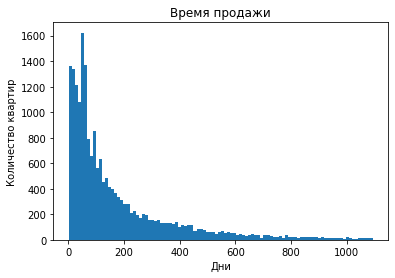

Количество объявлений, которые сняты через:
45 дней: 862
60 дней: 532
90 дней: 193


count    19875.00000
mean       171.65127
std        197.56545
min          1.00000
25%         44.00000
50%         93.00000
75%        225.00000
max       1095.00000
Name: days_exposition, dtype: float64

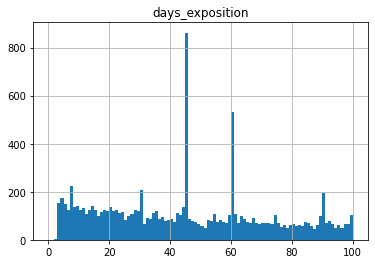

In [81]:
# Отбрасываем маркеры пустых значений
print('Медианное время продажи квартиры:', round(data.query('days_exposition != 77777')['days_exposition'].median()),'\n')
print('Среднее время продажи квартиры:', round(data.query('days_exposition != 77777')['days_exposition'].mean()),'\n')

# Гистограма времени продажи
plt.hist(data.query('days_exposition != 77777')['days_exposition'], bins=100)
plt.title('Время продажи')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()
data.hist('days_exposition', bins=100, range = (0,100));

# Смотрим выбросы платных объявлений
print('Количество объявлений, которые сняты через:')
print('45 дней:',data[data['days_exposition']==45]['days_exposition'].count())
print('60 дней:',data[data['days_exposition']==60]['days_exposition'].count())
print('90 дней:',data[data['days_exposition']==90]['days_exposition'].count())

# Изучаем значения срока продажи
data.query('days_exposition != 77777')['days_exposition'].describe()



Вывод: Среднее время продажи - 151 день. Медианное время продажи - 90 дней. Так происходит потому что некоторые квартиры продаются очень долго. \
Быстрыми продажами можно назвать сделки до 45 дней, долгими свыше 220 дней. \
На графике видны пики, соответствующие 45, 60 и 90 дням - вероятно это либо объявление удаленные системой т.к. не было подтверждения продления либо платные объявления, которые были сняты после истечения срока публикации.


#### Определение факторов, влияющих на стоимость квартиры

##### Расчет корреляции

In [82]:
list_for_corr = ['total_area',
                  'living_area',
                  'kitchen_area',
                  'rooms',
                  'floor_type_digit',
                  'weekday',
                  'month',
                  'year']

for col in list_for_corr:
    correlation = data['last_price'].corr(data[col])
    print(f'Корреляция между last_price и {col} составляет: {correlation:0.1%}')

Корреляция между last_price и total_area составляет: 76.9%
Корреляция между last_price и living_area составляет: 68.5%
Корреляция между last_price и kitchen_area составляет: 59.8%
Корреляция между last_price и rooms составляет: 48.6%
Корреляция между last_price и floor_type_digit составляет: 5.5%
Корреляция между last_price и weekday составляет: -1.2%
Корреляция между last_price и month составляет: 0.3%
Корреляция между last_price и year составляет: -3.8%


##### Графики

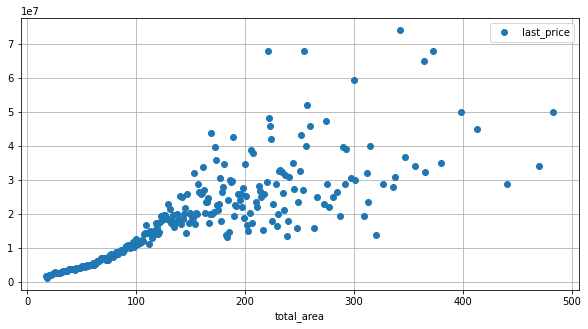

In [83]:
(
data.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(10, 5))
);


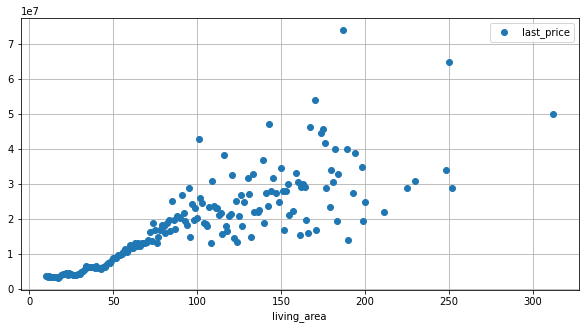

In [84]:
(
data.pivot_table(index='living_area', values='last_price')
    .plot(grid=True, style='o', figsize=(10, 5))
);


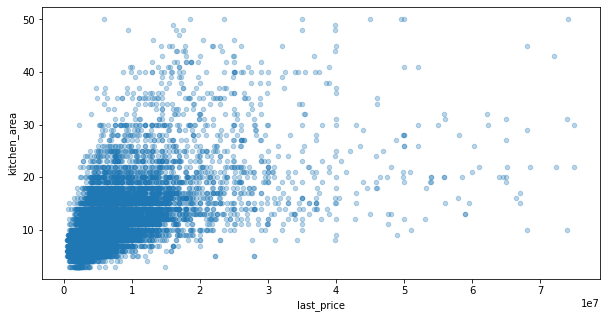

In [85]:
data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.3, figsize=(10, 5));

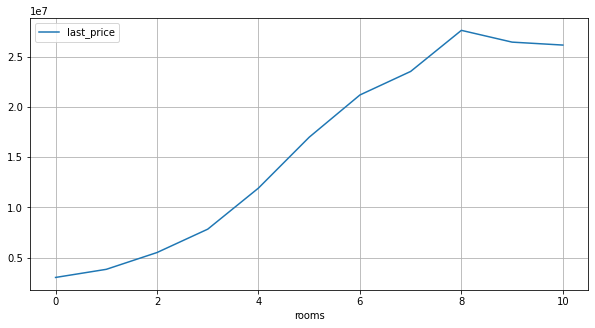

In [86]:
(
data.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, kind='line', figsize=(10, 5))
);


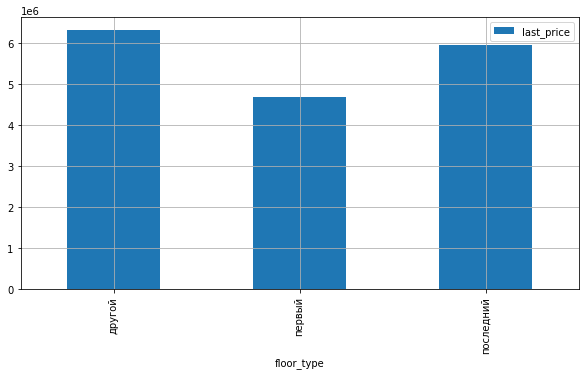

In [87]:
(
data.pivot_table(index='floor_type', values='last_price')
    .plot(grid=True, kind='bar',figsize=(10, 5))

);


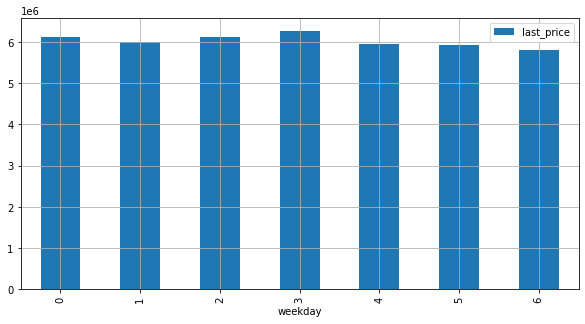

In [88]:
(
data.pivot_table(index='weekday', values='last_price')
    .plot(grid=True, kind='bar', figsize=(10, 5))
);



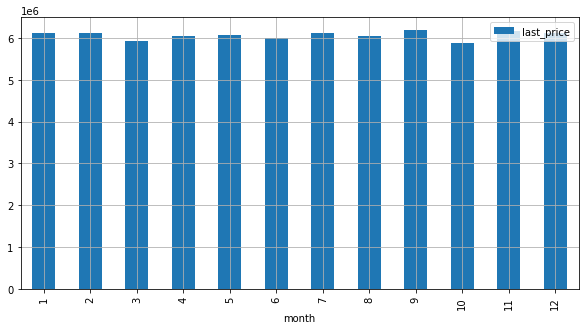

In [89]:
(
data.pivot_table(index='month', values='last_price')
    .plot(grid=True, kind='bar', figsize=(10, 5))
);


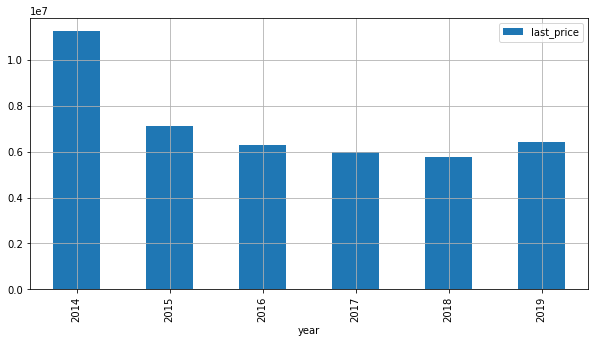

In [90]:
(
data.pivot_table(index='year', values='last_price')
    .plot(grid=True, kind='bar', figsize=(10, 5))
);


    
Вывод: 
1. Корреляция параметров площади и стоимости очень высокая. Чем больше площадь, тем выше стоимость. 
2. Количество комнат тоже влияет на стоимость не не так сильно, т.к. бывают квартиры с малым числом комнат, но с большими площадями. 
3. Квартиры на первом этаже дешевле остальных. 
4. Стоимсоть квартир с 2014 по 2018гг падала, но в 2019 выросла до уровня 2016 года. 

##### Сравнение средней цены квадратного метра в топ-10 населенных пунктах 

In [94]:
top_ten = data['locality_name'].value_counts().head(10)
print(top_ten)
city_sm_price = data.query('locality_name in (@top_ten.index)').pivot_table(index='locality_name', values='sm_price')
city_sm_price = city_sm_price.astype(int)
city_sm_price.sort_values('sm_price', ascending=False)

санкт-петербург      15226
поселок мурино         538
поселок шушары         435
всеволожск             389
пушкин                 356
колпино                335
поселок парголово      324
гатчина                303
деревня кудрово        296
выборг                 233
Name: locality_name, dtype: int64


,sm_price
locality_name,
санкт-петербург,113074
пушкин,103331
деревня кудрово,93039
поселок парголово,90581
поселок мурино,86116
поселок шушары,78902
колпино,75785
всеволожск,68930
гатчина,68928


Вывод: Ожидаемо самая дорогая недвижимость в Санкт-Петербурге. Затем идет Пушкин, ближайщий город к Санкт_Петербургу на юге, парки и низкоэтажная застройка. Далее бизлежайшие поселки, которые примыкают к Санкт-Петербургу. Затем Всеволожск и Гатчина, до них еще стоит добраться из Санкт-Петербурга). Замыкает топ-10 Выборг, город порядка 100км к северу от Санкт_Петербурга.

##### Расчет стоимости в зависимости от расстояния от центра

                           last_price
city_centers_nearest_km              
0                        2.120542e+07
1                        1.378273e+07
2                        1.308306e+07
3                        1.045178e+07
4                        1.123616e+07
5                        1.203350e+07
6                        1.249022e+07
7                        1.329642e+07
8                        9.122825e+06
9                        6.985006e+06
10                       6.505303e+06
11                       6.140021e+06
12                       5.833561e+06
13                       6.064506e+06
14                       5.612273e+06
15                       5.829030e+06
16                       5.390449e+06
17                       5.270803e+06
18                       5.115672e+06
19                       5.068618e+06
20                       6.006846e+06
21                       5.502941e+06
22                       5.422567e+06
23                       5.000798e+06
24          

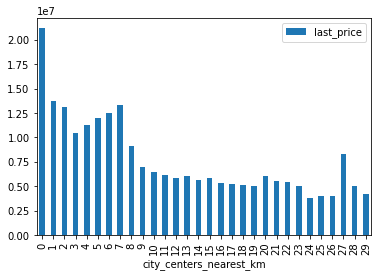

In [92]:
mean_price_km = (
    
    data[data['locality_name']=='санкт-петербург']
    .pivot_table(
        index='city_centers_nearest_km',
        values='last_price',
        aggfunc='mean')
)
mean_price_km.plot(kind='bar');

print(mean_price_km)
    


Вывод: Самая дорогая недвижимость в центе. До 1 км самые дорогие квартиры. От 1 до 7 км от центра цены более низкие. Далее стоимость постепенно снижается. Видим пик на 27 км от центра, возможно так повлияла стоимость недвижимости в курортном районе города.

### Общий вывод

На стоимосоть квартиры более всего влияет ее площадь. Количество комнат в меньшей степени, т.к. есть кваритры с малым количеством комнат, но с большой их площадью. Так же влияет и этажность на 1 этаже квартиры дешевле остальных. На цену квартир  влияет и отдаленность от условного центра Санкт-Петербурга, цена в центре самая высокая. Так же стоит отметить, что цена снижалась с 2014 по 2018гг., в 2019г стоимость поднялась до уровня 2016г.

Быстрые продажи - это сделки до 45 дней, долгие - свыше 220 дней. \
Есть много квартир, которые продаются очень быстро, за нескотлько дней. Но есть и варианты с сроком продажи более года.
В сроках продажи следует обратить внимание на выбросы, соответствующие 45, 60 и 90 дням - это объявления удаленные системой без подтверждения продления пользователем, либо платные объявления снятые после истечения срока публикации.

Дороже всего квадратный метр в Санкт-Петербурге - 113074р \
Дешевле всего квадратный метр в Выборге - 58359р \
В ТОП-10 входят в основном ближайшие к Санкт-Петербургу города и самые крупные города области: Пушкин, Гатчина, Всеволожск, Выборг.
Есть аномалия цен на квартиры в 27 км от центра, наверняко это квартиры в куротном районе на финском заливе.